In this notebook I accomplished several things. First I converted the StartDate column into datetime objects. Then I systematically created subsets for each nutrient separating our dataframce into samples taken before 2013 and samples taken during or after 2013. This separates the samples by the 2013 zoning ordinance that legalized Urban Farms in Boston. I did some visualizations. Box Plots comparing the two subsets for Phosphorus, Ammonia, and Nitrogen did not reveal any glaring difference in distributions. 

I then imported the Urban Farm location data that Gretchen and I compiled. From there I created a function that utilizes the Haversine formula to calculate the shortest distance in km from each sampling station to the nearest Urban Farm using the Latitude and Longitude columns in each dataframe. I then added a closest_farm_distance_km column that contains these distances for each sample to the water quality database. 

Next, I created scatterplots comparing each sample's nutrient levels against the new distance variable. These are saved in the Figures folder. There appears to be a very slight negative relationship but likely not anything statistically significant. 

I also ran OLS regressions of Nitrogen levels on distance variable for both the pre2013 and post2013 datasets. The pre2013 regression returned an R squared of .012 and an estimated coefficient of -0.0068 with a SE of .003. The post2013 regression returned an R squared of .065 and a coefficient of -.01 with a SE of .004.

Next steps are to the same regression on pre and post 2013 samples for other nutrients, do a multiple regresson of all samples for each nutrient on distance and a binary post 2013 variable. 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_excel('/Users/liamzeeum/Github/group4-project/Cleaned_Data.xlsx')
df.head()

,Watershed,Latitude,Longitude,StartDate,StartTime,DWM_Name,DWM_Units,ResVal,nResult
0,South Coastal,42.160283,-70.788634,6/25/2019,1:10:00 PM,Ammonia-N,mg/L,<0.20,-0.200
1,South Coastal,42.160283,-70.788634,6/25/2019,1:10:00 PM,Nitrate/Nitrite-N,mg/L,<0.20,-0.200
2,South Coastal,42.160283,-70.788634,6/25/2019,1:10:00 PM,Total Nitrogen,mg/L,0.77,0.770
3,South Coastal,42.160283,-70.788634,6/25/2019,1:10:00 PM,Total Phosphorus,mg/L,0.056,0.056
4,South Coastal,42.187649,-70.768508,6/25/2019,1:50:00 PM,Ammonia-N,mg/L,<0.20,-0.200


In [85]:
df_copy['StartDate'] = pd.to_datetime(df_copy['StartDate'], format='%m/%d/%Y')

for i, row in df_copy.iterrows():
    if row['StartDate'].year >= 2013:
        df_copy.loc[i, 'dummy_variable'] = 1
    else:
        df_copy.loc[i, 'dummy_variable'] = 0

df_copy.columns

Index(['Watershed', 'Latitude', 'Longitude', 'StartDate', 'StartTime',
       'DWM_Name', 'DWM_Units', 'ResVal', 'nResult',
       'closest_farm_distance_km', 'dummy_variable'],
      dtype='object')

,Watershed,Latitude,Longitude,StartDate,StartTime,DWM_Name,DWM_Units,ResVal,nResult,closest_farm_distance_km,dummy_variable
381,South Coastal,41.848792,-70.549915,2011-09-14,1:20:00 PM,Total Nitrogen,mg/L,0.44,0.44,65.299666,0.0
384,South Coastal,41.986540,-70.698858,2011-06-28,2:20:00 PM,Total Nitrogen,mg/L,0.67,0.67,45.737541,0.0
386,South Coastal,41.987834,-70.707868,2011-06-28,2:46:00 PM,Total Nitrogen,mg/L,0.80,0.80,45.117642,0.0
388,South Coastal,42.003955,-70.722156,2011-06-28,3:27:00 PM,Total Nitrogen,mg/L,0.59,0.59,43.008705,0.0
390,South Coastal,41.997918,-70.722181,2011-06-28,4:08:00 PM,Total Nitrogen,mg/L,0.78,0.78,43.490781,0.0


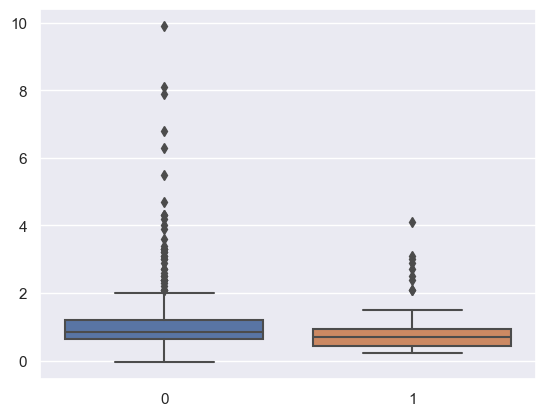

In [88]:
df_copy = df_copy

df_copy['StartDate'] = pd.to_datetime(df_copy['StartDate'], format='%m/%d/%Y')

for i, row in df_copy.iterrows():
    if row['StartDate'].year >= 2013:
        df.loc[i, 'dummy_variable'] = 1
    else:
        df.loc[i, 'dummy_variable'] = 0

nitrogen_pre2013_df = df_copy.loc[(df_copy['StartDate'].dt.year<2013) & (df_copy['DWM_Name'] == 'Total Nitrogen')]
nitrogen_post2013_df = df_copy.loc[(df_copy['StartDate'].dt.year>=2013) & (df_copy['DWM_Name'] == 'Total Nitrogen')]

import seaborn as sns

nitrogen_data = [nitrogen_pre2013_df['nResult'], nitrogen_post2013_df['nResult']]
sns.boxplot(data=nitrogen_data)
nitrogen_pre2013_df.head()







In [87]:

import scipy.stats as stats
nitrogen_pre2013_df = df_copy.loc[(df_copy['StartDate'].dt.year<2013) & (df_copy['DWM_Name'] == 'Total Nitrogen')]
nitrogen_post2013_df = df_copy.loc[(df_copy['StartDate'].dt.year>=2013) & (df_copy['DWM_Name'] == 'Total Nitrogen')]

stats.ttest_ind(nitrogen_post2013_df['nResult'], nitrogen_pre2013_df['nResult'], alternative='greater', nan_policy='omit')

Ttest_indResult(statistic=-2.7338781929763725, pvalue=0.9967790492841201)

<AxesSubplot:>

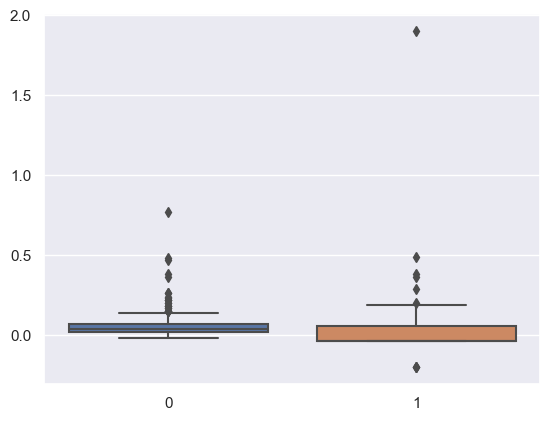

In [86]:
ammonia_pre2013_df = df_copy.loc[(df_copy['StartDate'].dt.year<2013) & (df_copy['DWM_Name'] == 'Ammonia-N')]
ammonia_post2013_df = df_copy.loc[(df_copy['StartDate'].dt.year>=2013) & (df_copy['DWM_Name'] == 'Ammonia-N')]

import seaborn as sns

ammonia_data = [ammonia_pre2013_df['nResult'], ammonia_post2013_df['nResult']]
sns.boxplot(data=ammonia_data)

In [41]:
ammonia_post2013_df.head()

,Watershed,Latitude,Longitude,StartDate,StartTime,DWM_Name,DWM_Units,ResVal,nResult,closest_farm_distance_km
0,South Coastal,42.160283,-70.788634,2019-06-25,1:10:00 PM,Ammonia-N,mg/L,<0.20,-0.200,27.900587
4,South Coastal,42.187649,-70.768508,2019-06-25,1:50:00 PM,Ammonia-N,mg/L,<0.20,-0.200,28.037568
8,South Coastal,42.198623,-70.832750,2019-06-25,3:00:00 PM,Ammonia-N,mg/L,<0.20,-0.200,22.707433
12,South Coastal,42.160283,-70.788634,2019-07-30,11:45:00 AM,Ammonia-N,mg/L,<0.040,-0.040,27.900587
16,South Coastal,42.187649,-70.768508,2019-07-30,12:15:00 PM,Ammonia-N,mg/L,0.051,0.051,28.037568


<AxesSubplot:>

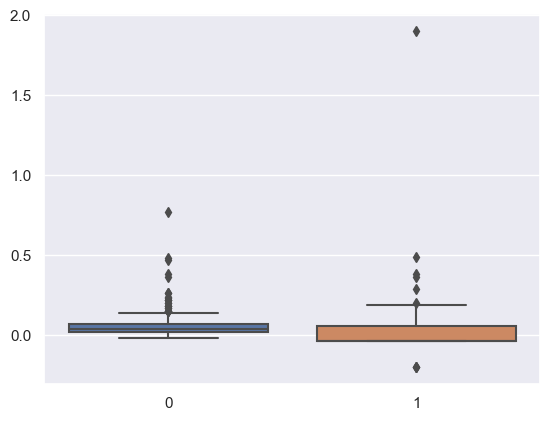

In [42]:
phosphorus_pre2013_df = df_copy.loc[(df_copy['StartDate'].dt.year<2013) & (df_copy['DWM_Name'] == 'Total Phosphorus')]
phosphorus_post2013_df = df_copy.loc[(df_copy['StartDate'].dt.year>=2013) & (df_copy['DWM_Name'] == 'Total Phosphorus')]

import seaborn as sns

phosphorus_data = [phosphorus_pre2013_df['nResult'], phosphorus_post2013_df['nResult']]
sns.boxplot(data=ammonia_data)

In [16]:
urbanfarm_df = pd.read_excel('/Users/liamzeeum/Github/group4-project/Urban Farm Location Data.xlsx')
urbanfarm_df.head()
urbanfarm_df

,Urban_Farm,Latitude,Longitude,Date_Started
0,"GLENWAY FARM, DORCHESTER",42.298743,-71.081662,2013
1,THE WEST COTTAGE FARM,42.320561,-71.074605,2013
2,87-89 CALLENDER STREET,42.288775,-71.082470,2016
3,SPORTSMEN'S TENNIS AND ENRICHMENT CENTER,42.292033,-71.088257,2013
4,CORNER STALK FARM,42.382788,-71.038268,2014
5,EASTIE FARM,42.368045,-71.036864,2015
6,FENWAY FARMS,42.346736,-71.097238,2015
7,WE GROW MICROGREENS,42.243007,-71.136730,2019
8,ALLANDALE FARMS,42.302382,-71.139116,1800
9,ASTORIA FARM,42.280889,-71.086793,2017


In [30]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    distance_lon = lon2-lon1
    distance_lat = lat2-lat1
    a = sin(distance_lat/2)**2 + cos(lat1) * cos(lat2) * sin(distance_lon/2)**2
    c = 2 * asin(sqrt(a))
    km = 6367 * c
    return km

distances = []
for i, sample in df_copy.iterrows():
    min_distance = np.inf
    for j, farm in urbanfarm_df.iterrows():
        distance = haversine(sample['Latitude'], sample['Longitude'], farm['Latitude'], farm['Longitude'])
        if distance < min_distance:
            min_distance=distance
    distances.append(min_distance)

df_copy['closest_farm_distance_km'] = distances

df_copy.head()





,Watershed,Latitude,Longitude,StartDate,StartTime,DWM_Name,DWM_Units,ResVal,nResult,closest_farm_distance_km
0,South Coastal,42.160283,-70.788634,2019-06-25,1:10:00 PM,Ammonia-N,mg/L,<0.20,-0.200,27.900587
1,South Coastal,42.160283,-70.788634,2019-06-25,1:10:00 PM,Nitrate/Nitrite-N,mg/L,<0.20,-0.200,27.900587
2,South Coastal,42.160283,-70.788634,2019-06-25,1:10:00 PM,Total Nitrogen,mg/L,0.77,0.770,27.900587
3,South Coastal,42.160283,-70.788634,2019-06-25,1:10:00 PM,Total Phosphorus,mg/L,0.056,0.056,27.900587
4,South Coastal,42.187649,-70.768508,2019-06-25,1:50:00 PM,Ammonia-N,mg/L,<0.20,-0.200,28.037568


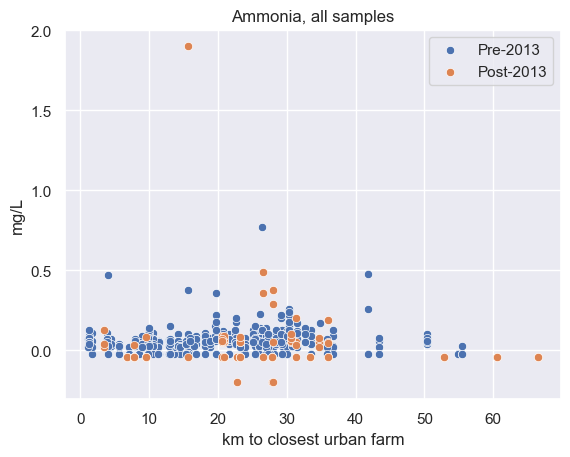

In [78]:
sns.set_theme()


figure, ax = plt.subplots()
sns.scatterplot(data=ammonia_pre2013_df, x='closest_farm_distance_km', y='nResult', label = 'Pre-2013')
sns.scatterplot(data=ammonia_post2013_df, x='closest_farm_distance_km', y='nResult', label = 'Post-2013')
ax.set_title('Ammonia, all samples')
ax.set_ylabel('mg/L')
ax.set_xlabel('km to closest urban farm')
plt.savefig('/Users/liamzeeum/Github/group4-project/Figures/Ammonia_all_samples')


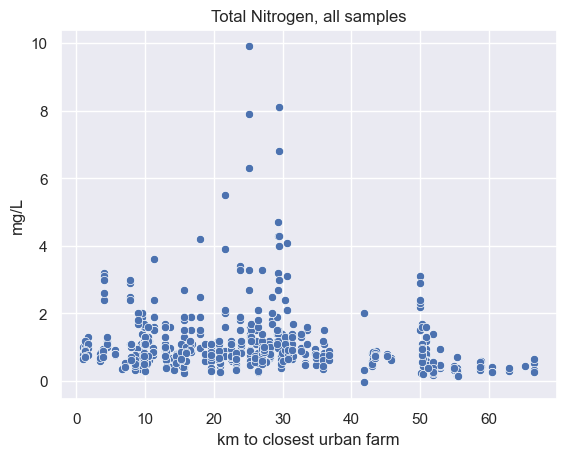

In [26]:
nitrogen_distance_df = df_copy.loc[(df_copy['DWM_Name'] == 'Total Nitrogen')]
figure, ax = plt.subplots()
sns.scatterplot(data=nitrogen_distance_df, x='closest_farm_distance_km', y='nResult')
ax.set_title('Total Nitrogen, all samples')
ax.set_ylabel('mg/L')
ax.set_xlabel('km to closest urban farm')
plt.savefig('/Users/liamzeeum/Github/group4-project/Figures/Nitrogen_all_samples')



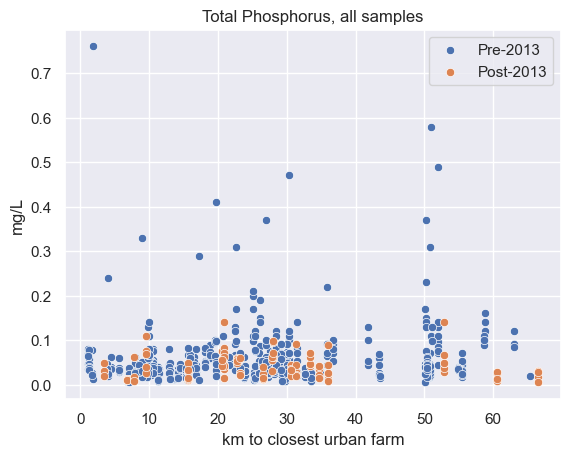

In [49]:
#phosphorus_distance_df = df_copy.loc[(df_copy['DWM_Name'] == 'Total Phosphorus')]
figure, ax = plt.subplots()
sns.scatterplot(data=phosphorus_pre2013_df, x='closest_farm_distance_km', y='nResult', label = 'Pre-2013')
sns.scatterplot(data=phosphorus_post2013_df, x='closest_farm_distance_km', y='nResult', label = 'Post-2013')
ax.set_title('Total Phosphorus, all samples')
ax.set_ylabel('mg/L')
ax.set_xlabel('km to closest urban farm')
plt.savefig('/Users/liamzeeum/Github/group4-project/Figures/Phosphorus_all_samples')


NameError: name 'nitrate_post_df' is not defined

Text(0.5, 0, 'km to closest urban farm')

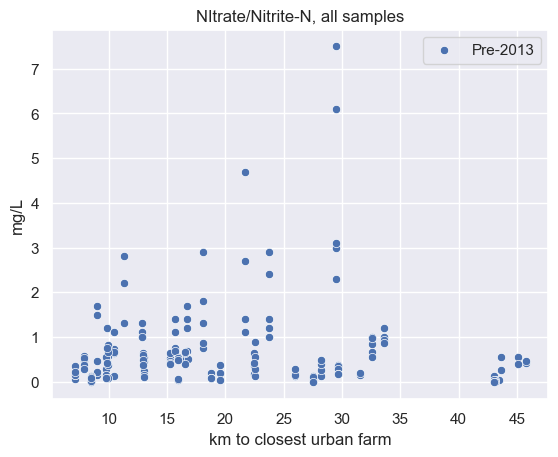

In [47]:
#nitrate_distance_df = df_copy.loc[(df_copy['DWM_Name'] == 'Nitrate/Nitrite-N')]
nitrate_pre2013_df = df_copy.loc[(df_copy['StartDate'].dt.year<2013) & (df_copy['DWM_Name'] == 'Nitrate/Nitrite-N')]
nitrate_post2013_df = df_copy.loc[(df_copy['StartDate'].dt.year>=2013) & (df_copy['DWM_Name'] == 'Nitrate/Nitrite')]
figure, ax = plt.subplots()
sns.scatterplot(data=nitrate_pre2013_df, x='closest_farm_distance_km', y='nResult', label = 'Pre-2013')
sns.scatterplot(data=nitrate_post2013_df, x='closest_farm_distance_km', y='nResult', label = 'Post-2013')
ax.set_title('NItrate/Nitrite-N, all samples')
ax.set_ylabel('mg/L')
ax.set_xlabel('km to closest urban farm')
#plt.savefig('/Users/liamzeeum/Github/group4-project/Figures/Nitrate_all_samples')


In [91]:
nitrogen_df  = df_copy.loc[ (df_copy['DWM_Name'] == 'Total Nitrogen')]

In [109]:
import statsmodels.formula.api as smf
ols_nitrogen_pre_2013 = smf.ols(formula='nResult ~ closest_farm_distance_km', data= nitrogen_pre2013_df).fit()
ols_nitrogen_post_2013 = smf.ols(formula='nResult ~ closest_farm_distance_km', data= nitrogen_post2013_df).fit()
ols_nitrogen = smf.ols(formula='nResult ~ closest_farm_distance_km + closest_farm_distance_km:dummy_variable', data= nitrogen_df).fit()

ols_nitrogen.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                nResult   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     8.537
Date:                Tue, 02 May 2023   Prob (F-statistic):           0.000221
Time:                        13:37:00   Log-Likelihood:                -817.94
No. Observations:                 609   AIC:                             1642.
Df Residuals:                     606   BIC:                             1655.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   1.2658      0.072     17.660      0.000       1.125       1.407
closest_farm_distance_km                   -0.0061      0.002     -2.434      0.015      -0.011      -0.001
closest_farm_distance_km:dummy_variable    -0.0074      0.003     -2.408      0.016      -0.013      -0.001
==============================================================================
Omnibus:                      587.274   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21205.389
Skew:                           4.353   Prob(JB):                         0.00
Kurtosis:                      30.566   Cond. No.                         59.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

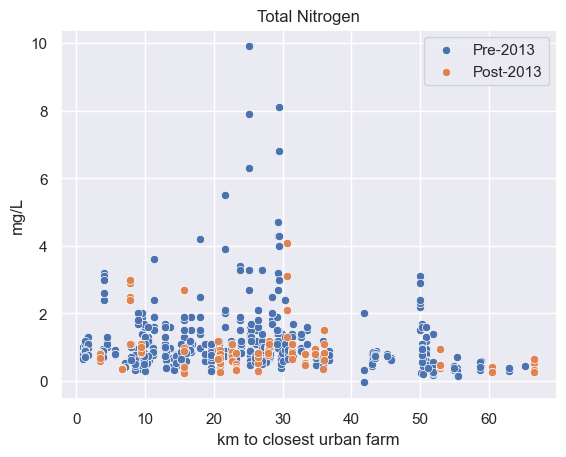

In [113]:
figure, ax = plt.subplots()
sns.scatterplot(data=nitrogen_pre2013_df, x='closest_farm_distance_km', y= 'nResult', label = 'Pre-2013')
sns.scatterplot(data=nitrogen_post2013_df, x='closest_farm_distance_km', y= 'nResult', label = 'Post-2013')
ax.set_title('Total Nitrogen')
ax.set_ylabel('mg/L')
ax.set_xlabel('km to closest urban farm')
ax.legend(loc='upper right')
plt.savefig('/Users/liamzeeum/Github/group4-project/Figures/Nitrogen_distance')

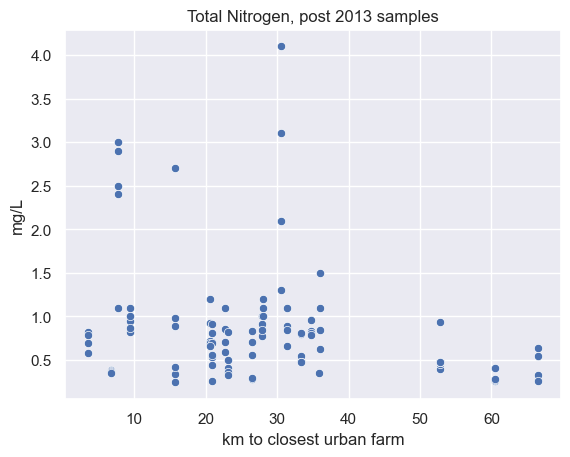

In [112]:
figure, ax = plt.subplots()
sns.scatterplot(data=nitrogen_post2013_df, x='closest_farm_distance_km', y= 'nResult')
ax.set_title('Total Nitrogen, post 2013 samples')
ax.set_ylabel('mg/L')
ax.set_xlabel('km to closest urban farm')
plt.savefig('/Users/liamzeeum/Github/group4-project/Figures/Nitrogen_post2013_samples')


In [103]:
phosphorus_df  = df_copy.loc[ (df_copy['DWM_Name'] == 'Phosphorus')]
ols_phosphorus_pre_2013 = smf.ols(formula='nResult ~ closest_farm_distance_km', data= phosphorus_pre2013_df).fit()
ols_phosphorus_post_2013 = smf.ols(formula='nResult ~ closest_farm_distance_km', data= phosphorus_post2013_df).fit()
ols_phosphorus = smf.ols(formula='nResult ~ closest_farm_distance_km + dummy_variable', data= phosphorus_df).fit()





ValueError: zero-size array to reduction operation maximum which has no identity

In [56]:
print(ols_phosphorus_post_2013.summary())

                            OLS Regression Results                            
Dep. Variable:                nResult   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7676
Date:                Mon, 01 May 2023   Prob (F-statistic):              0.383
Time:                        16:44:30   Log-Likelihood:                 231.35
No. Observations:                 106   AIC:                            -458.7
Df Residuals:                     104   BIC:                            -453.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [111]:
ols_ammonia_pre_2013 = smf.ols(formula='nResult ~ closest_farm_distance_km', data= ammonia_pre2013_df).fit()
ols_ammonia_post_2013 = smf.ols(formula='nResult ~ closest_farm_distance_km', data= ammonia_post2013_df).fit()
ols_ammonia = smf.ols(formula='nResult ~ closest_farm_distance_km + dummy_variable:closest_farm_distance_km', data= ammonia_post2013_df).fit()

print(ols_ammonia.summary())

                            OLS Regression Results                            
Dep. Variable:                nResult   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.6004
Date:                Tue, 02 May 2023   Prob (F-statistic):              0.441
Time:                        13:47:43   Log-Likelihood:                 4.2214
No. Observations:                  84   AIC:                            -4.443
Df Residuals:                      82   BIC:                            0.4188
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [59]:
print(ols_ammonia_post_2013.summary())

                            OLS Regression Results                            
Dep. Variable:                nResult   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.6004
Date:                Mon, 01 May 2023   Prob (F-statistic):              0.441
Time:                        16:45:48   Log-Likelihood:                 4.2214
No. Observations:                  84   AIC:                            -4.443
Df Residuals:                      82   BIC:                            0.4188
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

T-Tests


In [60]:
stats.ttest_ind(nitrogen_post2013_df['nResult'], nitrogen_pre2013_df['nResult'], alternative='two-sided', nan_policy='omit')

Ttest_indResult(statistic=-2.7338781929763725, pvalue=0.0064419014317596964)

In [61]:
stats.ttest_ind(phosphorus_post2013_df['nResult'], phosphorus_pre2013_df['nResult'], alternative='two-sided', nan_policy='omit')


Ttest_indResult(statistic=-2.733644704011147, pvalue=0.006445810386973598)

In [63]:
stats.ttest_ind(ammonia_post2013_df['nResult'], ammonia_pre2013_df['nResult'], alternative='two-sided', nan_policy='omit')

Ttest_indResult(statistic=-1.2776985236750187, pvalue=0.20193250688987674)

Text(0.5, 1.0, 'Sample Groups Nitrogen')

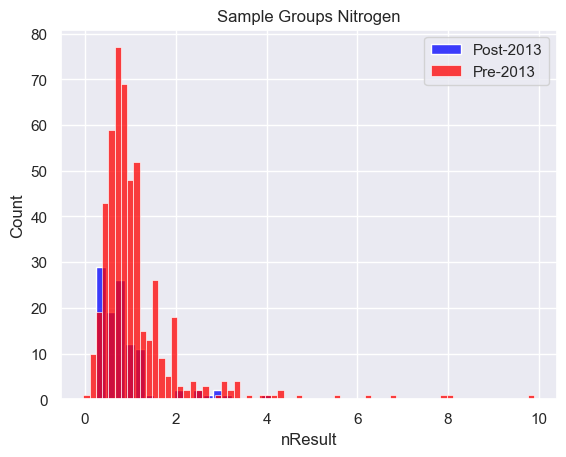

In [68]:
figure, ax = plt.subplots()
sns.histplot(nitrogen_post2013_df['nResult'], color= 'blue', label = 'Post-2013')
sns.histplot(nitrogen_pre2013_df['nResult'], color= 'red', label = 'Pre-2013')
ax.legend(loc = 'upper right')
ax.set_title('Sample Groups Nitrogen')

Text(0.5, 1.0, 'Sample Groups Phosphorus')

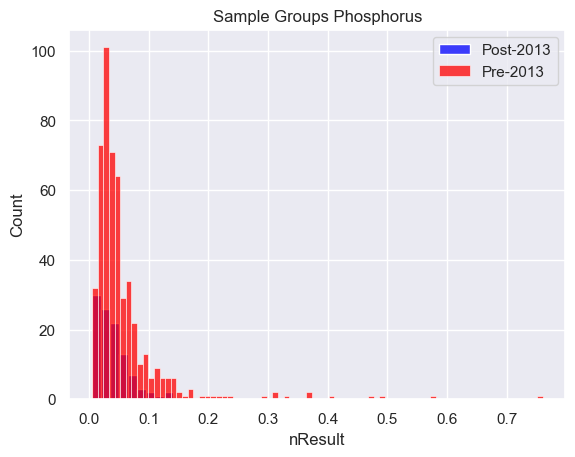

In [69]:
figure, ax = plt.subplots()
sns.histplot(phosphorus_post2013_df['nResult'], color= 'blue', label = 'Post-2013')
sns.histplot(phosphorus_pre2013_df['nResult'], color= 'red', label = 'Pre-2013')
ax.legend(loc = 'upper right')
ax.set_title('Sample Groups Phosphorus')

Text(0.5, 1.0, 'Sample Groups Ammonia')

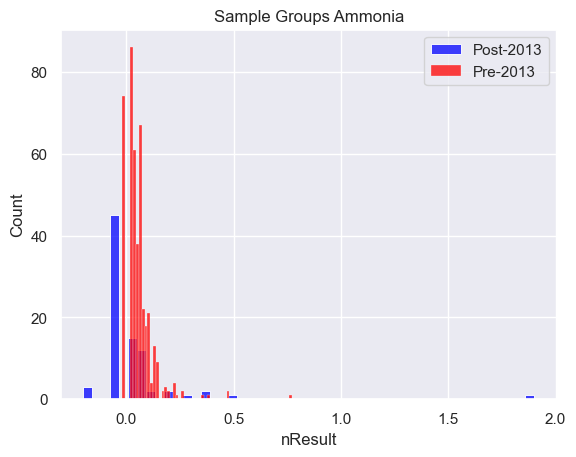

In [70]:
figure, ax = plt.subplots()
sns.histplot(ammonia_post2013_df['nResult'], color= 'blue', label = 'Post-2013')
sns.histplot(ammonia_pre2013_df['nResult'], color= 'red', label = 'Pre-2013')
ax.legend(loc = 'upper right')
ax.set_title('Sample Groups Ammonia')

OLS Summaries using distance variable

Nitrogen Pre 2013
Coeffecient: -0.0068
SE: 0.003
R-Squared .012

Nitrogen Post 2013
Coeffecient: -0.0101
SE: .004
R-Squared .065

Phosphorus Pre 2013
Coefficient: 0.0007
SE:  
R-Squared:  0.026

Phosphorus Post-2013
Non-sognificant results 


Ammonia Pre 2013
Coeeficient: .0002
Not significant 
R-Squared: .0002

Ammonia Post 2013
Non-significant 


OLS Summaries on full datasets using distance + an interaction term between distance and a dummy variable that equals 1 when the sample was taken during or after 2013

Nitrogen
Distance:
Coeffecient -> -0.0061
SE -> 0.002
Significant ->  yes 
Interaction Variable: 
Coefficient -> -0.0074
Significant -> yes

These results for nitrogen indicate that after 2013 the negative relationship between Distance and Nitrogen increases in magnitude. This means that after Urban Farms are legalized there is some evidence to suggest that closer distances led to higher nitrogen concentrations.

Ammonia
Non-significant results 

Phosphorus - redo 